In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

In [3]:
file_path = Path('card_transaction.v1.csv')
new_df = pd.read_csv(file_path)
new_df.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No


In [4]:
new_df.columns = new_df.columns.str.replace(' ', '')
new_df

,User,Card,Year,Month,Day,Time,Amount,UseChip,MerchantName,MerchantCity,MerchantState,Zip,MCC,Errors?,IsFraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386895,1999,1,2020,2,27,22:23,$-54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.0,5541,NaN,No
24386896,1999,1,2020,2,27,22:24,$54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.0,5541,NaN,No
24386897,1999,1,2020,2,28,07:43,$59.15,Chip Transaction,2500998799892805156,Merrimack,NH,3054.0,4121,NaN,No
24386898,1999,1,2020,2,28,20:10,$43.12,Chip Transaction,2500998799892805156,Merrimack,NH,3054.0,4121,NaN,No


In [5]:
new_df['IsFraud?'].value_counts()

No     24357143
Yes       29757
Name: IsFraud?, dtype: int64

In [6]:
new_df.isna().sum()

User                    0
Card                    0
Year                    0
Month                   0
Day                     0
Time                    0
Amount                  0
UseChip                 0
MerchantName            0
MerchantCity            0
MerchantState     2720821
Zip               2878135
MCC                     0
Errors?          23998469
IsFraud?                0
dtype: int64

In [7]:
new_df

,User,Card,Year,Month,Day,Time,Amount,UseChip,MerchantName,MerchantCity,MerchantState,Zip,MCC,Errors?,IsFraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386895,1999,1,2020,2,27,22:23,$-54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.0,5541,NaN,No
24386896,1999,1,2020,2,27,22:24,$54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.0,5541,NaN,No
24386897,1999,1,2020,2,28,07:43,$59.15,Chip Transaction,2500998799892805156,Merrimack,NH,3054.0,4121,NaN,No
24386898,1999,1,2020,2,28,20:10,$43.12,Chip Transaction,2500998799892805156,Merrimack,NH,3054.0,4121,NaN,No


In [8]:
new_df.columns

Index(['User', 'Card', 'Year', 'Month', 'Day', 'Time', 'Amount', 'UseChip',
       'MerchantName', 'MerchantCity', 'MerchantState', 'Zip', 'MCC',
       'Errors?', 'IsFraud?'],
      dtype='object')

In [9]:
list(new_df.describe())

['User', 'Card', 'Year', 'Month', 'Day', 'MerchantName', 'Zip', 'MCC']

In [10]:
new_df['Amount'] = pd.to_numeric(new_df['Amount'].str.replace('$', ''))
new_df

,User,Card,Year,Month,Day,Time,Amount,UseChip,MerchantName,MerchantCity,MerchantState,Zip,MCC,Errors?,IsFraud?
0,0,0,2002,9,1,06:21,134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386895,1999,1,2020,2,27,22:23,-54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.0,5541,NaN,No
24386896,1999,1,2020,2,27,22:24,54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.0,5541,NaN,No
24386897,1999,1,2020,2,28,07:43,59.15,Chip Transaction,2500998799892805156,Merrimack,NH,3054.0,4121,NaN,No
24386898,1999,1,2020,2,28,20:10,43.12,Chip Transaction,2500998799892805156,Merrimack,NH,3054.0,4121,NaN,No


In [11]:
cols_to_keep = ['Amount', 'Card', 'Year', 'Month', 'Day', 'MCC', 'IsFraud?']

In [12]:
new_df['UseChip'].value_counts()

Swipe Transaction     15386082
Chip Transaction       6287598
Online Transaction     2713220
Name: UseChip, dtype: int64

In [13]:
usechip_dummies_df = pd.get_dummies(new_df['UseChip'])

In [ ]:
# state_dummies_df = pd.get_dummies(new_df['MerchantState'])
# state_dummies_df

In [14]:
model_df = new_df[cols_to_keep]
model_df

,Amount,Card,Year,Month,Day,MCC,IsFraud?
0,134.09,0,2002,9,1,5300,No
1,38.48,0,2002,9,1,5411,No
2,120.34,0,2002,9,2,5411,No
3,128.95,0,2002,9,2,5651,No
4,104.71,0,2002,9,3,5912,No
...,...,...,...,...,...,...,...
24386895,-54.00,1,2020,2,27,5541,No
24386896,54.00,1,2020,2,27,5541,No
24386897,59.15,1,2020,2,28,4121,No
24386898,43.12,1,2020,2,28,4121,No


In [15]:
usechip_dummies_df.shape

(24386900, 3)

In [16]:
new_df.shape

(24386900, 15)

In [17]:
# the model that is ready for XGBoost and resampling
model_df = pd.concat([model_df, usechip_dummies_df], axis = 1)
model_df

,Amount,Card,Year,Month,Day,MCC,IsFraud?,Chip Transaction,Online Transaction,Swipe Transaction
0,134.09,0,2002,9,1,5300,No,0,0,1
1,38.48,0,2002,9,1,5411,No,0,0,1
2,120.34,0,2002,9,2,5411,No,0,0,1
3,128.95,0,2002,9,2,5651,No,0,0,1
4,104.71,0,2002,9,3,5912,No,0,0,1
...,...,...,...,...,...,...,...,...,...,...
24386895,-54.00,1,2020,2,27,5541,No,1,0,0
24386896,54.00,1,2020,2,27,5541,No,1,0,0
24386897,59.15,1,2020,2,28,4121,No,1,0,0
24386898,43.12,1,2020,2,28,4121,No,1,0,0


In [18]:
model_df['IsFraud?'].value_counts()

No     24357143
Yes       29757
Name: IsFraud?, dtype: int64

In [19]:
#Looking for the amount of "yes" and 'no' fraudulent transactions for each year
for year in new_df['Year'].unique():
    print(year, new_df[new_df['Year']==year]['IsFraud?'].value_counts())

2002 No     350593
Yes       139
Name: IsFraud?, dtype: int64
2003 No     466097
Yes       311
Name: IsFraud?, dtype: int64
2004 No     596383
Yes       620
Name: IsFraud?, dtype: int64
2005 No     746424
Yes       229
Name: IsFraud?, dtype: int64
2006 No     907675
Yes      1118
Name: IsFraud?, dtype: int64
2007 No     1062602
Yes       1881
Name: IsFraud?, dtype: int64
2008 No     1219750
Yes       3710
Name: IsFraud?, dtype: int64
2009 No     1354294
Yes       1140
Name: IsFraud?, dtype: int64
2010 No     1487390
Yes       3835
Name: IsFraud?, dtype: int64
2011 No     1570496
Yes         55
Name: IsFraud?, dtype: int64
2012 No     1609496
Yes       1333
Name: IsFraud?, dtype: int64
2013 No     1648899
Yes       2018
Name: IsFraud?, dtype: int64
2014 No     1671291
Yes       1052
Name: IsFraud?, dtype: int64
2015 No     1698090
Yes       3281
Name: IsFraud?, dtype: int64
2016 No     1705345
Yes       3579
Name: IsFraud?, dtype: int64
2017 No     1723105
Yes        255
Name: IsFraud?,

## Target Variable Class Distribution

In [20]:
import matplotlib.pyplot as plt

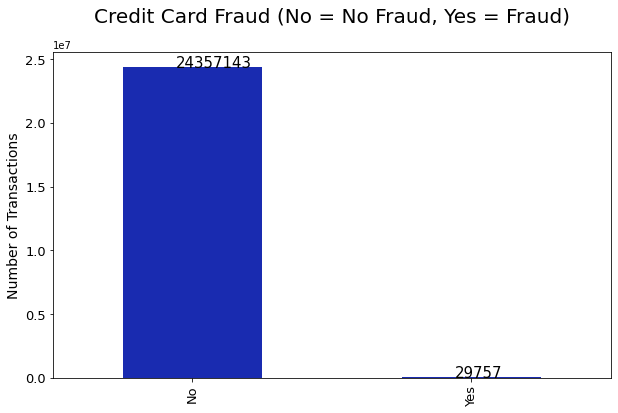

In [21]:
ax = model_df['IsFraud?'].value_counts().plot(kind = "bar", figsize = (10, 6), fontsize=13, color="#192bb0")
ax.set_title("Credit Card Fraud (No = No Fraud, Yes = Fraud)", size=20, pad=30)
ax.set_ylabel("Number of Transactions", fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=15)


In [22]:
# Change the stringd column
def change_string(Fraud):
    if Fraud == 'Yes':
        return 1
    else:
        return 0

model_df["IsFraud?"] = model_df["IsFraud?"].apply(change_string)
model_df.head()

,Amount,Card,Year,Month,Day,MCC,IsFraud?,Chip Transaction,Online Transaction,Swipe Transaction
0,134.09,0,2002,9,1,5300,0,0,0,1
1,38.48,0,2002,9,1,5411,0,0,0,1
2,120.34,0,2002,9,2,5411,0,0,0,1
3,128.95,0,2002,9,2,5651,0,0,0,1
4,104.71,0,2002,9,3,5912,0,0,0,1


In [23]:
#looking for how many different card values there are (What do the values mean?)
for card in model_df['Card'].unique():
    print(card, model_df[model_df['Card']==card]['Card'].value_counts())

0 0    8696411
Name: Card, dtype: int64
1 1    6493597
Name: Card, dtype: int64
2 2    4305594
Name: Card, dtype: int64
3 3    2790785
Name: Card, dtype: int64
4 4    1309120
Name: Card, dtype: int64
5 5    563097
Name: Card, dtype: int64
6 6    176729
Name: Card, dtype: int64
7 7    46383
Name: Card, dtype: int64
8 8    5184
Name: Card, dtype: int64


In [24]:
X = model_df.copy()
X = X.drop("IsFraud?", axis=1)
y = model_df["IsFraud?"].values

In [25]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X,
   y)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
Counter(y_train)

Counter({0: 18267899, 1: 22276})

In [39]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [40]:
Counter(y_resampled)

Counter({0: 18267899, 1: 18267899})

In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced

In [27]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
learning_rates = [0.75]


for learning_rate in learning_rates:
    my_classifier = GradientBoostingClassifier(n_estimators=10,
                                               learning_rate=learning_rate,
                                               max_features=5,
                                               max_depth=3,
                                               random_state=0)
    classifier.fit(X_train_scaled, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(classifier.score(X_train_scaled,
                                                                       y_train)))
    print("Accuracy score (validation): {0:.3f}".format(classifier.score(X_test_scaled, y_test)))

NameError: name 'classifier' is not defined

## Data Scaling

In [29]:
from sklearn.preprocessing import MinMaxScaler

# We are scaling only colums that have a value greater than 1
to_scale = [col for col in model_df.columns if model_df[col].max() >1]
mms = MinMaxScaler()
scaled = mms.fit_transform(model_df[to_scale])
scaled = pd.DataFrame(scaled, columns=to_scale)

#replace original colums with scaled ones
for col in scaled:
    model_df[col] = scaled[col]
    
model_df.head()

,Amount,Card,Year,Month,Day,MCC,IsFraud?,Chip Transaction,Online Transaction,Swipe Transaction
0,0.049190,0.0,0.37931,0.727273,0.000000,0.466649,0,0,0,1
1,0.041773,0.0,0.37931,0.727273,0.000000,0.481082,0,0,0,1
2,0.048124,0.0,0.37931,0.727273,0.033333,0.481082,0,0,0,1
3,0.048792,0.0,0.37931,0.727273,0.033333,0.512287,0,0,0,1
4,0.046911,0.0,0.37931,0.727273,0.066667,0.546223,0,0,0,1


In [30]:
from sklearn.model_selection import train_test_split

X = model_df.drop("IsFraud?", axis=1)
y = model_df["IsFraud?"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

print (f'''% Positive class in Train = {np.round(y_train.value_counts(normalize=True)[1]*100,2)}
% Positive Class in Test = {np.round(y_test.value_counts(normalize=True)[1]*100, 2)}''')

% Positive class in Train = 0.12
% Positive Class in Test = 0.12


In [ ]:
# Import dependecies needed
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

#Train 
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

#Evaluate
print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confussion_matrix(y_test, preds)
plt.figure(figsize=(8,6))
plt.title('Confusion Matrix (without SMOTE)', size =16)
sns.heatmap(cm, annot=True, cmap="Blues")



In [35]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [42]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X,y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after Smote: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True)*100

Shape of X before SMOTE: (24386900, 9)
Shape of X after Smote: (48714286, 9)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: IsFraud?, dtype: float64

In [48]:
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

confusion_matrix(y_test, y_pred)

print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.71      0.87      0.65      0.78      0.75      0.58   6088860
          1       0.83      0.65      0.87      0.73      0.75      0.55   6089712

avg / total       0.77      0.76      0.76      0.76      0.75      0.57  12178572



In [ ]:
# Import dependecies needed
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confussion_matrix(y_test, preds)
plt.figure(figsize=(8,6))
plt.title('Confusion Matrix (with SMOTE)', size =16)
sns.heatmap(cm, annot=True, cmap="Blues")